In [ ]:
password = None

In [ ]:
%reload_ext autoreload
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import getpass
import pandas as pd
import numpy as np

from utils import load_json_benchmarks, filter_results, plot_comparison

repetitions = 10

In [ ]:
if password is None:
    password = getpass.getpass()

In [ ]:
# Disable cpu frequency scaling
!echo $password | sudo -S cpupower frequency-set -g performance

../../cmake-build-release/benchmark/comparison/benchmark-s3rvac-cpp-bencoding \
   --benchmark_repetitions=$repetitions \
   --benchmark_out_format=json \
   --benchmark_out="benchmark-s3rvac-cpp-bencoding.json"

../../cmake-build-release/benchmark/comparison/benchmark-jimporter-bencode \
   --benchmark_repetitions=$repetitions \
   --benchmark_out_format=json \
   --benchmark_out="benchmark-jimporter-bencode.json"

../../cmake-build-release/benchmark/comparison/benchmark-arvidn-libtorrent \
   --benchmark_repetitions=$repetitions \
   --benchmark_out_format=json \
   --benchmark_out="benchmark-arvidn-libtorrent.json"

../../cmake-build-release/benchmark/comparison/benchmark-fbdtemme-bencode \
    --benchmark_repetitions=$repetitions \
    --benchmark_out_format=json \
    --benchmark_out="benchmark-fbdtemme-bencode.json"

In [ ]:
# reenable cpu frequency scaling
!echo $password | sudo -S cpupower frequency-set -g powersave

In [154]:
df = pd.concat([
    filter_results(load_json_benchmarks("benchmark-jimporter-bencode.json"),         "jimporter/bencode"),
    filter_results(load_json_benchmarks("benchmark-arvidn-libtorrent.json"),         "arvidn/libtorrent"),
    filter_results(load_json_benchmarks("benchmark-s3rvac-cpp-bencoding.json"),      "s3rvac/cpp-bencoding"),
    filter_results(load_json_benchmarks("benchmark-fbdtemme-bencode.json"),          "fbdtemme/bencode")
])

In [155]:
grouped_df = df.groupby(["library", "test_type", "test_file"])["bytes_per_second"]
results = pd.DataFrame({"mean" : grouped_df.mean(), "stddev": grouped_df.std()})

results_value = results.loc[results.index.get_level_values("test_type") == "decode_value", :]
results_value = results_value.droplevel(1)
results_value = results_value.drop(index = "arvidn/libtorrent")

In [156]:
results_view = results.loc[results.index.get_level_values("test_type") == "decode_view", :]
results_view = results_view.droplevel(1)
results_view = results_view.drop(index = "s3rvac/cpp-bencoding")

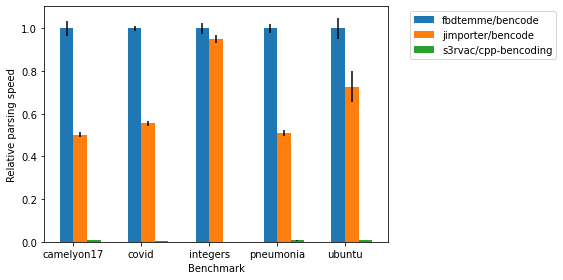

In [161]:
ax = plot_comparison(results_value, figsize=(8, 4))
ax.set_xlabel("Benchmark")

ax.figure.tight_layout()
# ax.figure.savefig("../../docs/images/benchmark-decoding-value.svg")

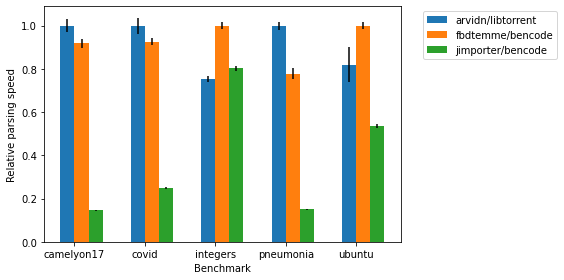

In [162]:
ax = plot_comparison(results_view, figsize=(8, 4))
ax.set_xlabel("Benchmark")

ax.figure.tight_layout()
# ax.figure.savefig("../../docs/images/benchmark-decoding-view.svg")

In [ ]:
df = pd.concat([
    filter_results(load_json_benchmarks("benchmark-fbdtemme-bencode-baseline.json"),   "fbdtemme/bencode (baseline)"),
        filter_results(load_json_benchmarks("benchmark-fbdtemme-bencode-new.json"),   "fbdtemme/bencode (new)")

])

grouped_df = df.groupby(["library", "test_type", "test_file"])["bytes_per_second"]
results = pd.DataFrame({"mean" : grouped_df.mean(), "stddev": grouped_df.std()})

results_value = results.loc[results.index.get_level_values("test_type") == "decode_value", :]
results_value = results_value.droplevel(1)

results_view = results.loc[results.index.get_level_values("test_type") == "decode_view", :]
results_view = results_view.droplevel(1)


In [ ]:
ax = plot_comparison(results_value, figsize=(8, 4))
ax.set_xlabel("Benchmark")

ax.figure.tight_layout()
# ax.figure.savefig("../docs/images/benchmark-decoding-value.svg")

In [ ]:
ax = plot_comparison(results_view, figsize=(8, 4))
ax.set_xlabel("Benchmark")

ax.figure.tight_layout()
# ax.figure.savefig("../docs/images/benchmark-decoding-view.svg")